In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

energia2022 = pd.read_csv('daasbstp2023/train/energia_202201-202212.csv', encoding='latin-1')    
energia2021 = pd.read_csv('daasbstp2023/train/energia_202109-202112.csv', encoding='latin-1')

energia2023_test = pd.read_csv('daasbstp2023/test/energia_202301-202304.csv', encoding='latin-1')

meteo2022 = pd.read_csv('daasbstp2023/train/meteo_202201-202212.csv', encoding='latin-1')
meteo2021 = pd.read_csv('daasbstp2023/train/meteo_202109-202112.csv', encoding='latin-1')

meteo2023_test = pd.read_csv('daasbstp2023/test/meteo_202301-202304.csv', encoding='latin-1')


# Converter datas
energia2021['Data'] = pd.to_datetime(energia2021['Data'], format='%Y-%m-%d')
energia2021['Hora'] = pd.to_datetime(energia2021['Hora'], format='%H')

energia2021['dt_converted'] = energia2021['Data'] + pd.to_timedelta(energia2021['Hora'].dt.hour, unit='h')

energia2021['dt_converted'] = pd.to_datetime(energia2021['dt_converted'], unit='s', utc=True)


energia2022['Data'] = pd.to_datetime(energia2022['Data'], format='%Y-%m-%d')
energia2022['Hora'] = pd.to_datetime(energia2022['Hora'], format='%H')

energia2022['dt_converted'] = energia2022['Data'] + pd.to_timedelta(energia2022['Hora'].dt.hour, unit='h')

energia2022['dt_converted'] = pd.to_datetime(energia2022['dt_converted'], unit='s', utc=True)


energia2023_test['Data'] = pd.to_datetime(energia2023_test['Data'], format='%Y-%m-%d')
energia2023_test['Hora'] = pd.to_datetime(energia2023_test['Hora'], format='%H')

energia2023_test['dt_converted'] = energia2023_test['Data'] + pd.to_timedelta(energia2023_test['Hora'].dt.hour, unit='h')

energia2023_test['dt_converted'] = pd.to_datetime(energia2023_test['dt_converted'], unit='s', utc=True)


meteo2021['dt_converted'] = pd.to_datetime(meteo2021['dt'], unit='s', utc=True)
meteo2022['dt_converted'] = pd.to_datetime(meteo2022['dt'], unit='s', utc=True)
meteo2023_test['dt_converted'] = pd.to_datetime(meteo2023_test['dt'], unit='s', utc=True)

# Merge datasets based on datetime
data21 = pd.merge(energia2021, meteo2021, on='dt_converted', how='inner')
data22 = pd.merge(energia2022, meteo2022, on='dt_converted', how='inner')

test = pd.merge(energia2023_test, meteo2023_test, on='dt_converted', how='outer')

# Drop columns
data21.drop('sea_level', axis=1, inplace=True)
data21.drop('grnd_level', axis=1, inplace=True)
data21.drop('rain_1h', axis=1, inplace=True)
data21.drop('Data', axis=1, inplace=True)
data21.drop('Hora', axis=1, inplace=True)
data21.drop('dt_iso', axis=1, inplace=True)
data21.drop('dt', axis=1, inplace=True)

data22.drop('sea_level', axis=1, inplace=True)
data22.drop('grnd_level', axis=1, inplace=True)
data22.drop('rain_1h', axis=1, inplace=True)
data22.drop('Data', axis=1, inplace=True)
data22.drop('Hora', axis=1, inplace=True)
data22.drop('dt_iso', axis=1, inplace=True)
data22.drop('dt', axis=1, inplace=True)

test.drop('sea_level', axis=1, inplace=True)
test.drop('grnd_level', axis=1, inplace=True)
test.drop('rain_1h', axis=1, inplace=True)
test.drop('Data', axis=1, inplace=True)
test.drop('Hora', axis=1, inplace=True)
test.drop('dt_iso', axis=1, inplace=True)
test.drop('dt', axis=1, inplace=True)

data21.drop('city_name', axis=1, inplace=True)
data22.drop('city_name', axis=1, inplace=True)
test.drop('city_name', axis=1, inplace=True)

train = pd.concat([data21, data22], axis=0)


# separar data em ano, mes e dia

train['ano'] = train['dt_converted'].apply(lambda x: x.year)
train['mes'] = train['dt_converted'].apply(lambda x: x.month)
train['dia'] = train['dt_converted'].apply(lambda x: x.day)
train['hora'] = train['dt_converted'].apply(lambda x: x.hour)

train['dia da semana'] = train['dt_converted'].apply(lambda x: x.weekday())

test['ano'] = test['dt_converted'].apply(lambda x: x.year)
test['mes'] = test['dt_converted'].apply(lambda x: x.month)
test['dia'] = test['dt_converted'].apply(lambda x: x.day)
test['hora'] = test['dt_converted'].apply(lambda x: x.hour)

test['dia da semana'] = test['dt_converted'].apply(lambda x: x.weekday())

train.drop('dt_converted', axis=1, inplace=True)
test.drop('dt_converted', axis=1, inplace=True)

lb_make = LabelEncoder()
train["weather_description"] = lb_make.fit_transform(train["weather_description"])
test["weather_description"] = lb_make.fit_transform(test["weather_description"])

train['weather_description'].unique()


train['Injeção na rede (kWh)'] = train['Injeção na rede (kWh)'].fillna('None')

dict_target = {"None": 0, "Low": 1, "Medium": 2, "High": 3, "Very High": 4}
train["Injeção na rede (kWh)"] = train["Injeção na rede (kWh)"].map(dict_target)


,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description,ano,mes,dia,hora,dia da semana
count,2256.000000,2256.000000,2256.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,2256.000000,2256.0,2256.000000,2256.000000,2256.000000,2256.000000
mean,0.268060,0.226809,0.119439,10.599606,9.543265,9.177917,11.643813,1023.493721,75.639840,2.873613,44.489726,5.620124,2023.0,2.085106,14.978723,11.500000,2.978723
std,0.464323,0.375752,0.190601,3.715156,4.191224,4.021176,3.596882,6.650873,17.415468,1.620450,42.972438,2.392843,0.0,0.907143,8.925982,6.923721,2.026759
min,0.000000,0.000000,0.000000,0.930000,-1.790000,-0.850000,3.340000,1006.000000,23.000000,0.120000,0.000000,0.000000,2023.0,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,7.877500,6.217500,6.247500,8.900000,1020.000000,62.000000,1.800000,0.000000,4.000000,2023.0,1.000000,7.000000,5.750000,1.000000
50%,0.000000,0.000000,0.000000,10.950000,10.135000,9.710000,11.820000,1024.000000,81.000000,2.490000,35.000000,7.000000,2023.0,2.000000,15.000000,11.500000,3.000000
75%,0.398750,0.336000,0.237250,13.292500,12.742500,12.320000,14.040000,1029.000000,91.000000,3.500000,96.000000,7.000000,2023.0,3.000000,23.000000,17.250000,5.000000
max,3.381000,2.771000,1.161000,20.610000,19.790000,20.010000,22.010000,1036.000000,97.000000,10.320000,100.000000,8.000000,2023.0,4.000000,31.000000,23.000000,6.000000


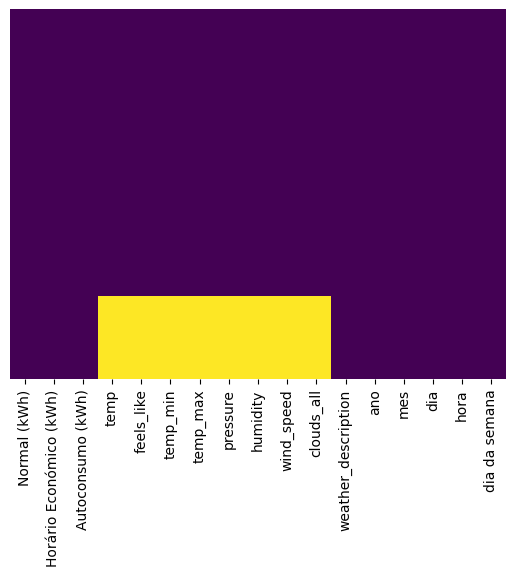

In [279]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')
test.describe()

In [280]:
test["temp"] = test["temp"].interpolate(method='linear', limit_direction='forward', axis=0)
test["temp_min"] = test["temp_min"].interpolate(method='linear', limit_direction='forward', axis=0)
test["temp_max"] = test["temp_max"].interpolate(method='linear', limit_direction='forward', axis=0)
test["pressure"] = test["pressure"].interpolate(method='linear', limit_direction='forward', axis=0)
test["humidity"] = test["humidity"].interpolate(method='linear', limit_direction='forward', axis=0)
test["wind_speed"] = test["wind_speed"].interpolate(method='linear', limit_direction='forward', axis=0)
test["clouds_all"] = test["clouds_all"].interpolate(method='linear', limit_direction='forward', axis=0)

<Axes: >

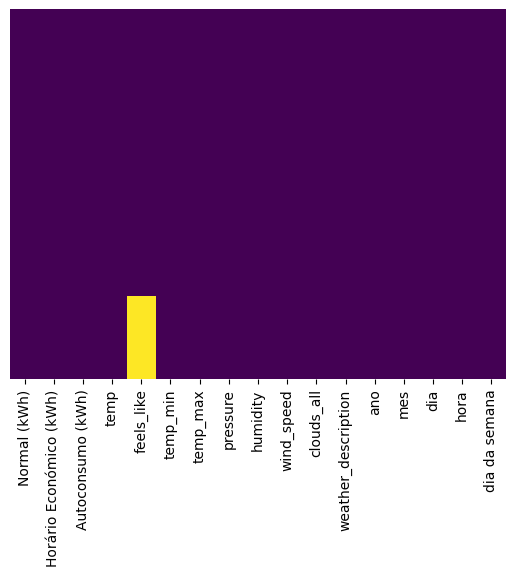

In [281]:
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# # Lista das colunas que você deseja prever independentemente
# columns_to_predict = ['temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'clouds_all']

# #o dataset de treino nao pode ter valores nulos
# test2 = test.dropna(subset=columns_to_predict)

# #dropar colunas que nao serao usadas para prever "columns_to_predict"
# # test3 = test.drop(columns_to_predict, axis=1)
# # Iterar sobre as colunas e treinar modelos separados
# for column in columns_to_predict:
    
#     train_data = test2.dropna(subset=[column])
#     predict_data = test[test[column].isnull()]
    
#     for i in columns_to_predict:
#         if i != column:
#             train_data = train_data.drop(i, axis=1)
#         predict_data = predict_data.drop(i, axis=1)
        
    
#     X_train = train_data.drop(column, axis=1)
#     y_train = train_data[column]

#     # Treinar o modelo (usando regressão linear neste exemplo)
#     model = DecisionTreeRegressor()
#     model.fit(X_train, y_train)

#     # Fazer previsões para os valores ausentes
#     predictions = model.predict(predict_data)

#     # Adicionar as previsões ao DataFrame original
#     test.loc[test[column].isnull(), column] = predictions
    
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [282]:
test.describe()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description,ano,mes,dia,hora,dia da semana
count,2256.000000,2256.000000,2256.000000,2256.000000,1752.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.0,2256.000000,2256.000000,2256.000000,2256.000000
mean,0.268060,0.226809,0.119439,10.610864,9.543265,9.048808,11.672004,1023.160018,79.071365,2.497487,35.667553,5.620124,2023.0,2.085106,14.978723,11.500000,2.978723
std,0.464323,0.375752,0.190601,3.273828,4.191224,3.551593,3.169974,5.893633,16.627142,1.590902,41.286521,2.392843,0.0,0.907143,8.925982,6.923721,2.026759
min,0.000000,0.000000,0.000000,0.930000,-1.790000,-0.850000,3.340000,1006.000000,23.000000,0.120000,0.000000,0.000000,2023.0,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,8.895000,6.217500,7.490000,10.010000,1021.000000,68.000000,1.190000,2.000000,4.000000,2023.0,1.000000,7.000000,5.750000,1.000000
50%,0.000000,0.000000,0.000000,10.650000,10.135000,8.600000,11.770000,1022.000000,87.000000,2.100000,5.000000,7.000000,2023.0,2.000000,15.000000,11.500000,3.000000
75%,0.398750,0.336000,0.237250,12.520000,12.742500,11.680000,13.720000,1028.000000,91.000000,3.100000,85.000000,7.000000,2023.0,3.000000,23.000000,17.250000,5.000000
max,3.381000,2.771000,1.161000,20.610000,19.790000,20.010000,22.010000,1036.000000,97.000000,10.320000,100.000000,8.000000,2023.0,4.000000,31.000000,23.000000,6.000000


# 3 - ...

## Outliers

In [283]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             2256 non-null   float64
 1   Horário Económico (kWh)  2256 non-null   float64
 2   Autoconsumo (kWh)        2256 non-null   float64
 3   temp                     2256 non-null   float64
 4   feels_like               1752 non-null   float64
 5   temp_min                 2256 non-null   float64
 6   temp_max                 2256 non-null   float64
 7   pressure                 2256 non-null   float64
 8   humidity                 2256 non-null   float64
 9   wind_speed               2256 non-null   float64
 10  clouds_all               2256 non-null   float64
 11  weather_description      2256 non-null   int32  
 12  ano                      2256 non-null   int64  
 13  mes                      2256 non-null   int64  
 14  dia                     

count    2256.000000
mean        0.268060
std         0.464323
min         0.000000
25%         0.000000
50%         0.000000
75%         0.398750
max         3.381000
Name: Normal (kWh), dtype: float64

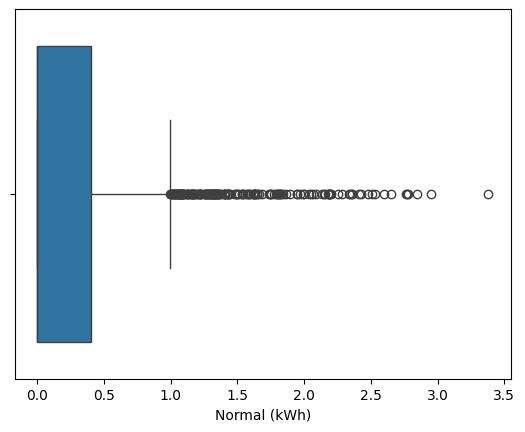

In [284]:
sns.boxplot(x=test["Normal (kWh)"])
test["Normal (kWh)"].describe()

count    2256.000000
mean        0.226809
std         0.375752
min         0.000000
25%         0.000000
50%         0.000000
75%         0.336000
max         2.771000
Name: Horário Económico (kWh), dtype: float64

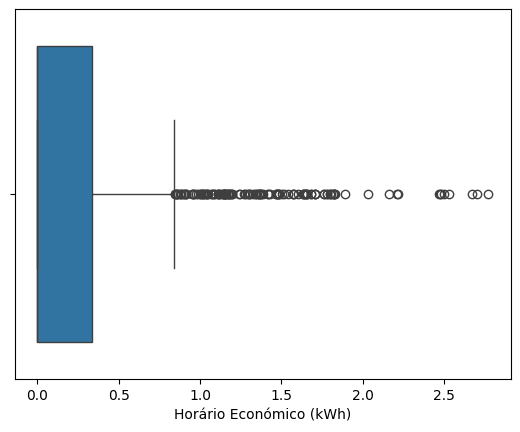

In [285]:
sns.boxplot(x=test["Horário Económico (kWh)"])
test["Horário Económico (kWh)"].describe()

count    2256.000000
mean        0.119439
std         0.190601
min         0.000000
25%         0.000000
50%         0.000000
75%         0.237250
max         1.161000
Name: Autoconsumo (kWh), dtype: float64

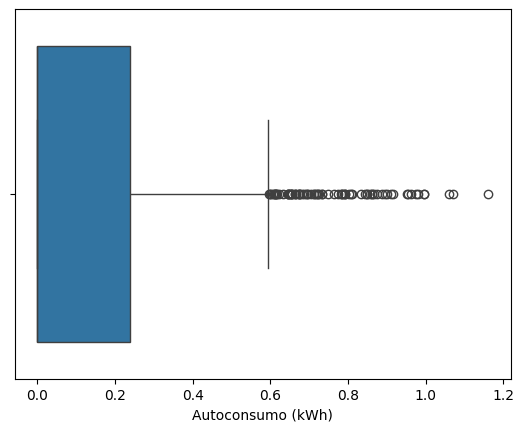

In [286]:
sns.boxplot(x=test["Autoconsumo (kWh)"])
test["Autoconsumo (kWh)"].describe()

count    2256.000000
mean       10.610864
std         3.273828
min         0.930000
25%         8.895000
50%        10.650000
75%        12.520000
max        20.610000
Name: temp, dtype: float64

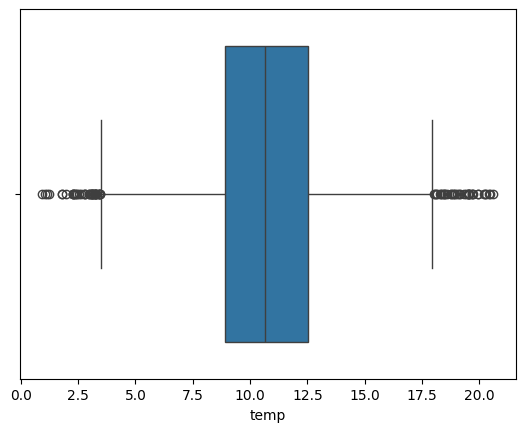

In [287]:
sns.boxplot(x=test["temp"])
test["temp"].describe()

count    1752.000000
mean        9.543265
std         4.191224
min        -1.790000
25%         6.217500
50%        10.135000
75%        12.742500
max        19.790000
Name: feels_like, dtype: float64

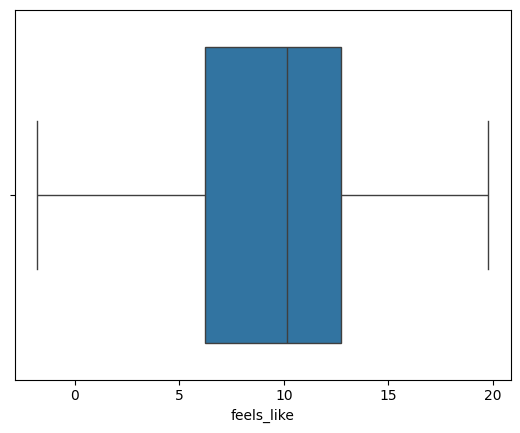

In [288]:
sns.boxplot(x=test["feels_like"])
test["feels_like"].describe()

count    2256.000000
mean        9.048808
std         3.551593
min        -0.850000
25%         7.490000
50%         8.600000
75%        11.680000
max        20.010000
Name: temp_min, dtype: float64

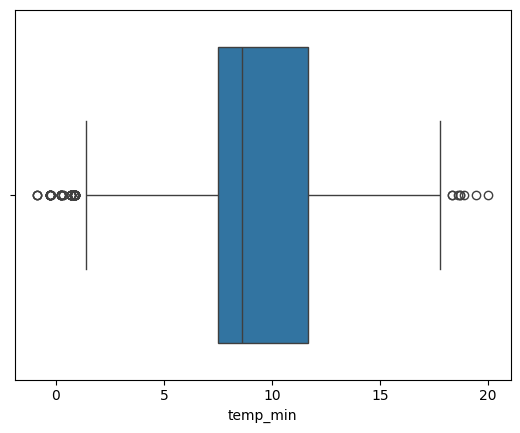

In [289]:
sns.boxplot(x=test["temp_min"])
test["temp_min"].describe()

count    2256.000000
mean       11.672004
std         3.169974
min         3.340000
25%        10.010000
50%        11.770000
75%        13.720000
max        22.010000
Name: temp_max, dtype: float64

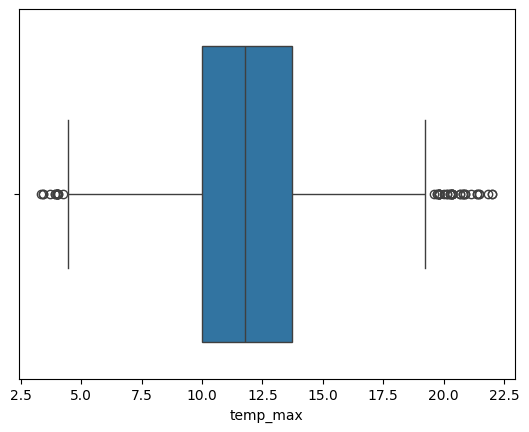

In [290]:
sns.boxplot(x=test["temp_max"])
test["temp_max"].describe()

count    2256.000000
mean     1023.160018
std         5.893633
min      1006.000000
25%      1021.000000
50%      1022.000000
75%      1028.000000
max      1036.000000
Name: pressure, dtype: float64

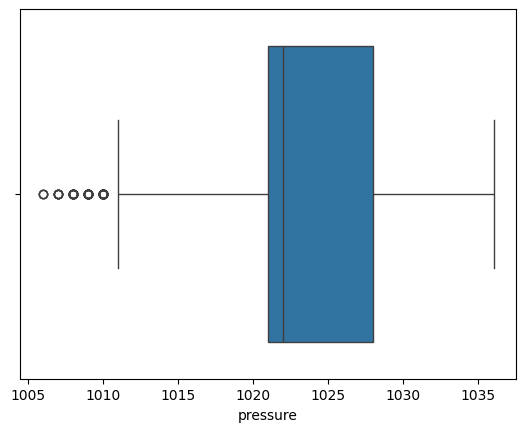

In [291]:
sns.boxplot(x=test["pressure"])
test["pressure"].describe()

count    2256.000000
mean       79.071365
std        16.627142
min        23.000000
25%        68.000000
50%        87.000000
75%        91.000000
max        97.000000
Name: humidity, dtype: float64

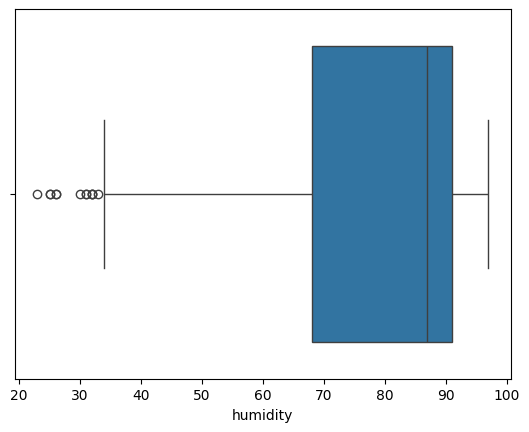

In [292]:
sns.boxplot(x=test["humidity"])
test["humidity"].describe()

count    2256.000000
mean        2.497487
std         1.590902
min         0.120000
25%         1.190000
50%         2.100000
75%         3.100000
max        10.320000
Name: wind_speed, dtype: float64

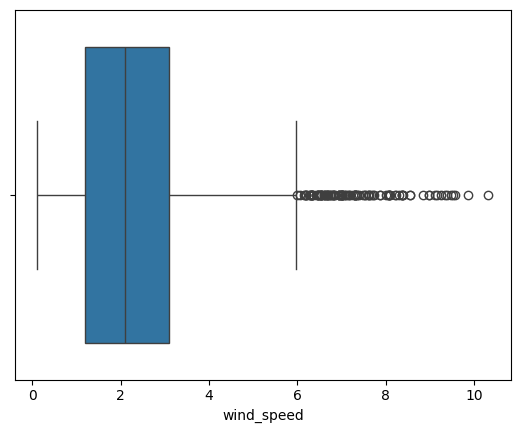

In [293]:
sns.boxplot(x=test["wind_speed"])
test["wind_speed"].describe()

count    2256.000000
mean       35.667553
std        41.286521
min         0.000000
25%         2.000000
50%         5.000000
75%        85.000000
max       100.000000
Name: clouds_all, dtype: float64

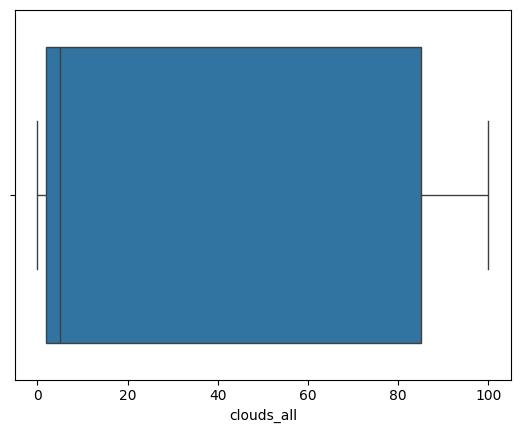

In [294]:
sns.boxplot(x=test["clouds_all"])
test["clouds_all"].describe()

# Drop de colunas 

In [295]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11016 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    11016 non-null  int64  
 4   temp                     11016 non-null  float64
 5   feels_like               11016 non-null  float64
 6   temp_min                 11016 non-null  float64
 7   temp_max                 11016 non-null  float64
 8   pressure                 11016 non-null  int64  
 9   humidity                 11016 non-null  int64  
 10  wind_speed               11016 non-null  float64
 11  clouds_all               11016 non-null  int64  
 12  weather_description      11016 non-null  int32  
 13  ano                      11016 non-null  int64  
 14  mes                      110

In [296]:
test.drop('feels_like', axis=1, inplace=True)
train.drop('feels_like', axis=1, inplace=True)

train.drop('ano', axis=1, inplace=True)
test.drop('ano', axis=1, inplace=True)

train.drop('mes', axis=1, inplace=True)
test.drop('mes', axis=1, inplace=True)

train.drop('dia', axis=1, inplace=True)
test.drop('dia', axis=1, inplace=True)

train.drop('dia da semana', axis=1, inplace=True)
test.drop('dia da semana', axis=1, inplace=True)

train.drop('wind_speed', axis=1, inplace=True)
test.drop('wind_speed', axis=1, inplace=True)

train.drop('pressure', axis=1, inplace=True)
test.drop('pressure', axis=1, inplace=True)

train.drop('weather_description', axis=1, inplace=True)
test.drop('weather_description', axis=1, inplace=True)




# Correlação

<Axes: >

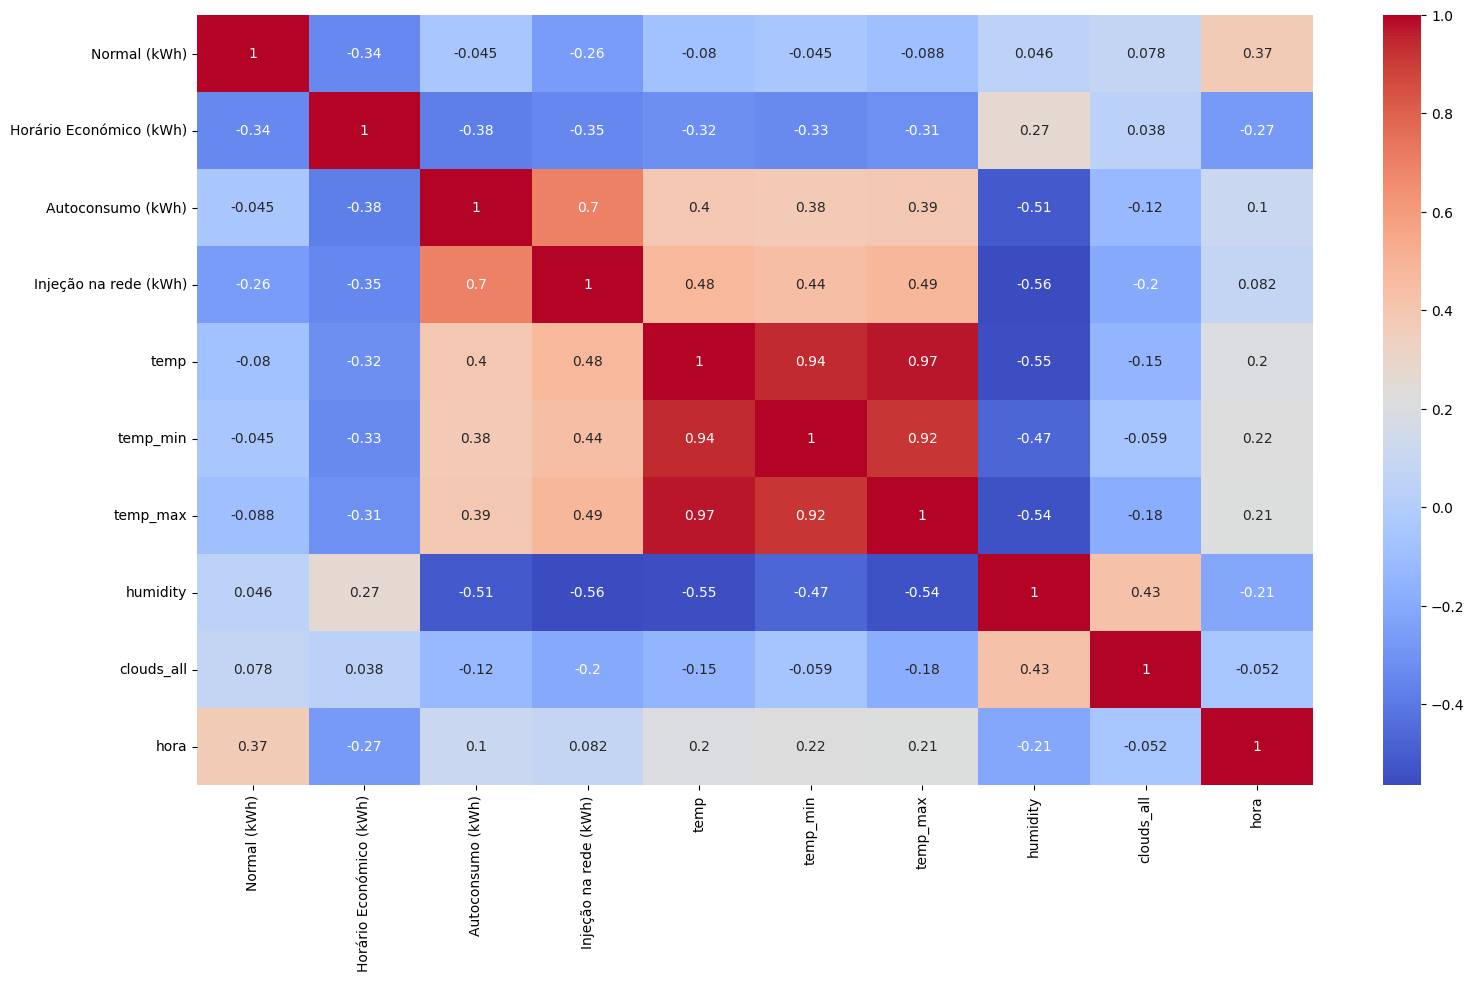

In [297]:
plt.subplots(figsize=(18,10))
train_corr = train.corr(method='pearson')
sns.heatmap(train_corr, annot = True, cmap='coolwarm')

## Normalização

In [298]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             2256 non-null   float64
 1   Horário Económico (kWh)  2256 non-null   float64
 2   Autoconsumo (kWh)        2256 non-null   float64
 3   temp                     2256 non-null   float64
 4   temp_min                 2256 non-null   float64
 5   temp_max                 2256 non-null   float64
 6   humidity                 2256 non-null   float64
 7   clouds_all               2256 non-null   float64
 8   hora                     2256 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 158.8 KB


In [299]:
# test['Normal (kWh)'] = (test['Normal (kWh)'] - test['Normal (kWh)'].mean()) / (test['Normal (kWh)'].max() - test['Normal (kWh)'].min())
# train['Normal (kWh)'] = (train['Normal (kWh)'] - train['Normal (kWh)'].mean()) / (train['Normal (kWh)'].max() - train['Normal (kWh)'].min())

# test['Horário Económico (kWh)'] = (test['Horário Económico (kWh)'] - test['Horário Económico (kWh)'].mean()) / (test['Horário Económico (kWh)'].max() - test['Horário Económico (kWh)'].min())
# train['Horário Económico (kWh)'] = (train['Horário Económico (kWh)'] - train['Horário Económico (kWh)'].mean()) / (train['Horário Económico (kWh)'].max() - train['Horário Económico (kWh)'].min())

# test['Autoconsumo (kWh)'] = (test['Autoconsumo (kWh)'] - test['Autoconsumo (kWh)'].mean()) / (test['Autoconsumo (kWh)'].max() - test['Autoconsumo (kWh)'].min())
# train['Autoconsumo (kWh)'] = (train['Autoconsumo (kWh)'] - train['Autoconsumo (kWh)'].mean()) / (train['Autoconsumo (kWh)'].max() - train['Autoconsumo (kWh)'].min())

# test['temp'] = (test['temp'] - test['temp'].mean()) / (test['temp'].max() - test['temp'].min())
# train['temp'] = (train['temp'] - train['temp'].mean()) / (train['temp'].max() - train['temp'].min())

# # test['feels_like'] = (test['feels_like'] - test['feels_like'].mean()) / (test['feels_like'].max() - test['feels_like'].min())
# # train['feels_like'] = (train['feels_like'] - train['feels_like'].mean()) / (train['feels_like'].max() - train['feels_like'].min())

# test['temp_min'] = (test['temp_min'] - test['temp_min'].mean()) / (test['temp_min'].max() - test['temp_min'].min())
# train['temp_min'] = (train['temp_min'] - train['temp_min'].mean()) / (train['temp_min'].max() - train['temp_min'].min())

# test['temp_max'] = (test['temp_max'] - test['temp_max'].mean()) / (test['temp_max'].max() - test['temp_max'].min())
# train['temp_max'] = (train['temp_max'] - train['temp_max'].mean()) / (train['temp_max'].max() - train['temp_max'].min())

# test['pressure'] = (test['pressure'] - test['pressure'].mean()) / (test['pressure'].max() - test['pressure'].min())
# train['pressure'] = (train['pressure'] - train['pressure'].mean()) / (train['pressure'].max() - train['pressure'].min())

# test['humidity'] = (test['humidity'] - test['humidity'].mean()) / (test['humidity'].max() - test['humidity'].min())
# train['humidity'] = (train['humidity'] - train['humidity'].mean()) / (train['humidity'].max() - train['humidity'].min())

# test['wind_speed'] = (test['wind_speed'] - test['wind_speed'].mean()) / (test['wind_speed'].max() - test['wind_speed'].min())
# train['wind_speed'] = (train['wind_speed'] - train['wind_speed'].mean()) / (train['wind_speed'].max() - train['wind_speed'].min())

# test['clouds_all'] = (test['clouds_all'] - test['clouds_all'].mean()) / (test['clouds_all'].max() - test['clouds_all'].min())
# train['clouds_all'] = (train['clouds_all'] - train['clouds_all'].mean()) / (train['clouds_all'].max() - train['clouds_all'].min())


In [300]:
test.describe()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,temp_min,temp_max,humidity,clouds_all,hora
count,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000
mean,0.268060,0.226809,0.119439,10.610864,9.048808,11.672004,79.071365,35.667553,11.500000
std,0.464323,0.375752,0.190601,3.273828,3.551593,3.169974,16.627142,41.286521,6.923721
min,0.000000,0.000000,0.000000,0.930000,-0.850000,3.340000,23.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,8.895000,7.490000,10.010000,68.000000,2.000000,5.750000
50%,0.000000,0.000000,0.000000,10.650000,8.600000,11.770000,87.000000,5.000000,11.500000
75%,0.398750,0.336000,0.237250,12.520000,11.680000,13.720000,91.000000,85.000000,17.250000
max,3.381000,2.771000,1.161000,20.610000,20.010000,22.010000,97.000000,100.000000,23.000000


In [301]:
train.describe()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),temp,temp_min,temp_max,humidity,clouds_all,hora
count,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000
mean,0.202278,0.159714,0.117314,0.758987,16.182991,14.195064,17.288098,76.570715,54.000908,11.500000
std,0.349478,0.271792,0.176762,1.281918,5.756972,4.956014,6.164689,16.268260,40.553002,6.922501
min,0.000000,0.000000,0.000000,0.000000,0.320000,-0.640000,1.330000,19.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,12.080000,10.720000,12.890000,66.000000,7.000000,5.750000
50%,0.000000,0.000000,0.000000,0.000000,15.625000,14.230000,16.260000,81.000000,60.000000,11.500000
75%,0.314000,0.288000,0.227000,2.000000,19.270000,17.490000,20.340000,91.000000,98.000000,17.250000
max,3.251000,6.978000,1.192000,4.000000,40.850000,36.720000,41.450000,100.000000,100.000000,23.000000


In [302]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense#, Dropout, BatchNormalization
from scikeras.wrappers import KerasRegressor#, KerasClassifier

In [303]:
train_feat = train.drop(['Injeção na rede (kWh)'], axis = 1)
train_target = train[['Injeção na rede (kWh)']]

x_train = train_feat
y_train= np.ravel(train_target) 

# Normalização

In [304]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(train_feat)
scaler_Y = MinMaxScaler(feature_range=(0, 1)).fit(train_target)
feat_scaled = pd.DataFrame(scaler_X.transform(train_feat[train_feat.columns]), columns=train_feat.columns)
target_scaled = pd.DataFrame(scaler_Y.transform(train_target[train_target.columns]), columns=train_target.columns)

In [305]:
feat_scaled.describe()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,temp_min,temp_max,humidity,clouds_all,hora
count,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000
mean,0.062220,0.022888,0.098418,0.391389,0.397084,0.397759,0.710750,0.540009,0.500000
std,0.107499,0.038950,0.148290,0.142042,0.132656,0.153656,0.200843,0.405530,0.300978
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.290155,0.304069,0.288136,0.580247,0.070000,0.250000
50%,0.000000,0.000000,0.000000,0.377622,0.398019,0.372134,0.765432,0.600000,0.500000
75%,0.096586,0.041273,0.190436,0.467555,0.485278,0.473829,0.888889,0.980000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [306]:
# sns.heatmap(train_target.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# split train 

In [307]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(feat_scaled, train_target, test_size=0.2, random_state=1000)

## SVM

In [308]:
# param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}

# grid = GridSearchCV(SVC(random_state=1000),param_grid,refit=True,verbose=3)

In [309]:
# scores = cross_val_score(grid, feat_scaled, train_target, cv=10)

In [310]:
# print("Result for SVM: %0.4f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [311]:
# grid.fit(x_train2, y_train2)

In [312]:
# predictions = grid.predict(x_test2)

# predictions

In [313]:
# from sklearn.metrics import precision_score
# precision = precision_score(y_test2, predictions, average='micro')

# print(f'Precision: {precision}')

# #Confusion Matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test2, predictions)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4])
# disp.plot()

## Random Forest

In [314]:
modelRandomForest = RandomForestClassifier(n_estimators = 500)
scores = cross_val_score(modelRandomForest, x_train, y_train, cv=10)
print("Result for Random Forest: %0.4f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))

Result for Random Forest: 0.8594 accuracy with standard deviation of 0.02


In [315]:
modelRandomForest.fit(x_train,y_train)
predictions = modelRandomForest.predict(test)


dict_target = {0 : "None", 1: "Low", 2: "Medium", 3: "High", 4:"Very_High"}
sto_numeric = [dict_target[result] for result in predictions]

result_df = pd.DataFrame({'RowId': range(1, len(predictions)+1), 'Result': sto_numeric})
result_df.to_csv("dummy_submission.csv", index=False)

## Redes Neuronais

In [316]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(feat_scaled, target_scaled, test_size=0.2, random_state=1000)

In [339]:
#tanh
def build_model(activation = 'tanh', learning_rate = 0.01):
    model = Sequential()
    model.add(Dense(32, input_dim = 9, activation = activation))
    model.add(Dense(16, activation = activation))
    model.add(Dense(8, activation = activation))
    model.add(Dense(1, activation = activation))
    
    model.compile(loss = 'mae', 
            optimizer = tf.optimizers.Adam(learning_rate), 
            metrics = ['mae','mse'])
    return model

In [340]:
model = build_model()
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_144 (Dense)           (None, 32)                320       
                                                                 
 dense_145 (Dense)           (None, 16)                528       
                                                                 
 dense_146 (Dense)           (None, 8)                 136       
                                                                 
 dense_147 (Dense)           (None, 1)                 9         
                                                                 
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [341]:
optimizer = ['SGD', 'RMSprop', 'Adagrad']
param_grid = dict(optimizer = optimizer)

In [342]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 2021)

In [343]:
model = KerasRegressor(model = build_model, batch_size = 32,validation_split = 0.2, epochs = 25)

In [344]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='neg_mean_absolute_error', refit='True', verbose=1)

In [345]:
grid_search.fit(x_train2, y_train2)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Epoch 1/25
177/177 [==============================] - 1s 2ms/step - loss: 0.1125 - mae: 0.1125 - mse: 0.0383 - val_loss: 0.0755 - val_mae: 0.0755 - val_mse: 0.0204
Epoch 2/25
177/177 [==============================] - 0s 2ms/step - loss: 0.0725 - mae: 0.0725 - mse: 0.0202 - val_loss: 0.0849 - val_mae: 0.0849 - val_mse: 0.0204
Epoch 3/25
177/177 [==============================] - 0s 2ms/step - loss: 0.0672 - mae: 0.0672 - mse: 0.0184 - val_loss: 0.0606 - val_mae: 0.0606 - val_mse: 0.0160
Epoch 4/25
177/177 [==============================] - 0s 2ms/step - loss: 0.0652 - mae: 0.0652 - mse: 0.0179 - val_loss: 0.0609 - val_mae: 0.0609 - val_mse: 0.0151
Epoch 5/25
177/177 [==============================] - 0s 2ms/step - loss: 0.0637 - mae: 0.0637 - mse: 0.0168 - val_loss: 0.0625 - val_mae: 0.0625 - val_mse: 0.0146
Epoch 6/25
177/177 [==============================] - 0s 2ms/step - loss: 0.0641 - mae: 0.0641 - mse: 0.0169 - val_loss:

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=KerasRegressor(batch_size=32, epochs=25, model=<function build_model at 0x000002621279F060>, validation_split=0.2),
             param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad']},
             refit='True', scoring='neg_mean_absolute_error', verbose=1)

In [346]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best: -0.054832 using {'optimizer': 'RMSprop'}


In [347]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

In [348]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

-0.056006 (0.003855) with: {'optimizer': 'SGD'}
-0.054832 (0.001068) with: {'optimizer': 'RMSprop'}
-0.062976 (0.008889) with: {'optimizer': 'Adagrad'}


In [349]:
best_mlp_model = grid_search.best_estimator_
print(best_mlp_model)

KerasRegressor(
	model=<function build_model at 0x000002621279F060>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=RMSprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=25
)


In [350]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best: -0.054832 using {'optimizer': 'RMSprop'}


In [351]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

In [352]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

-0.056006 (0.003855) with: {'optimizer': 'SGD'}
-0.054832 (0.001068) with: {'optimizer': 'RMSprop'}
-0.062976 (0.008889) with: {'optimizer': 'Adagrad'}


In [353]:
best_mlp_model_2 = grid_search.best_estimator_
print(best_mlp_model_2)

KerasRegressor(
	model=<function build_model at 0x000002621279F060>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=RMSprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=25
)


In [354]:
best_mlp_model_2.fit(x_train2,y_train2,epochs = 25, validation_data = (x_train2,y_train2), verbose = 1)

Epoch 1/25
276/276 [==============================] - 2s 3ms/step - loss: 0.0999 - mae: 0.0999 - mse: 0.0305 - val_loss: 0.0821 - val_mae: 0.0821 - val_mse: 0.0200
Epoch 2/25
276/276 [==============================] - 1s 2ms/step - loss: 0.0683 - mae: 0.0683 - mse: 0.0184 - val_loss: 0.0588 - val_mae: 0.0588 - val_mse: 0.0164
Epoch 3/25
276/276 [==============================] - 1s 2ms/step - loss: 0.0640 - mae: 0.0640 - mse: 0.0168 - val_loss: 0.0601 - val_mae: 0.0601 - val_mse: 0.0160
Epoch 4/25
276/276 [==============================] - 1s 2ms/step - loss: 0.0629 - mae: 0.0629 - mse: 0.0163 - val_loss: 0.0655 - val_mae: 0.0655 - val_mse: 0.0162
Epoch 5/25
276/276 [==============================] - 1s 2ms/step - loss: 0.0607 - mae: 0.0607 - mse: 0.0165 - val_loss: 0.0567 - val_mae: 0.0567 - val_mse: 0.0145
Epoch 6/25
276/276 [==============================] - 1s 2ms/step - loss: 0.0595 - mae: 0.0595 - mse: 0.0163 - val_loss: 0.0539 - val_mae: 0.0539 - val_mse: 0.0147
Epoch 7/25
276/2

KerasRegressor(
	model=<function build_model at 0x000002621279F060>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=RMSprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=25
)

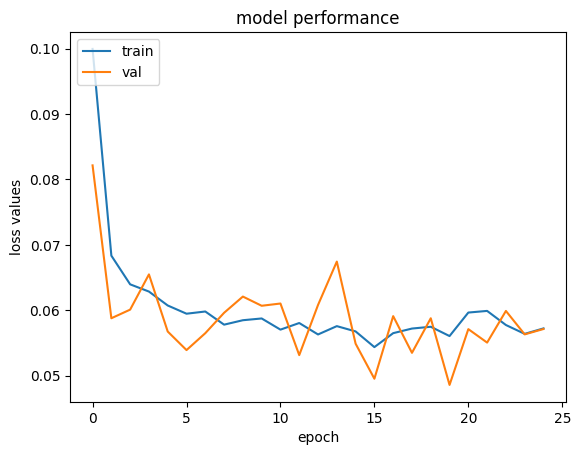

In [355]:
plt.plot(best_mlp_model_2.history_['loss'])
plt.plot(best_mlp_model_2.history_['val_loss'])
plt.title('model performance')
plt.ylabel('loss values')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

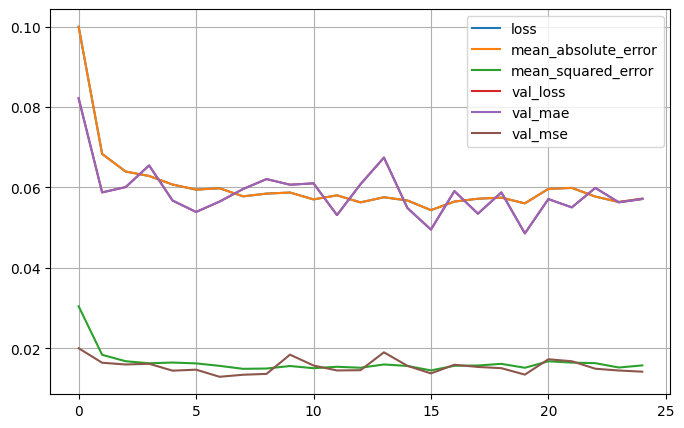

In [356]:
pd.DataFrame(best_mlp_model_2.history_).plot(figsize=(8, 5))
plt.grid(True)


### Predictions

In [357]:
predictions = best_mlp_model_2.predict(x_test2)

69/69 [==============================] - 0s 989us/step


In [358]:
predictions
#unscale
predictions = scaler_Y.inverse_transform(predictions)
predictions[predictions < 0] = 0
predictions[predictions > 4] = 4
#round
predictions = np.round(predictions)
p = pd.DataFrame(predictions)
p.to_csv("predictions.csv")
p.nunique()

#list of different values
p2 = np.unique(p)
p2

array([0., 1., 2., 3.], dtype=float32)

In [359]:
y_test2 = scaler_Y.inverse_transform(y_test2)

p3 = np.unique(y_test2)
p3

array([0., 1., 2., 3., 4.])

Precision: 0.8348457350272233


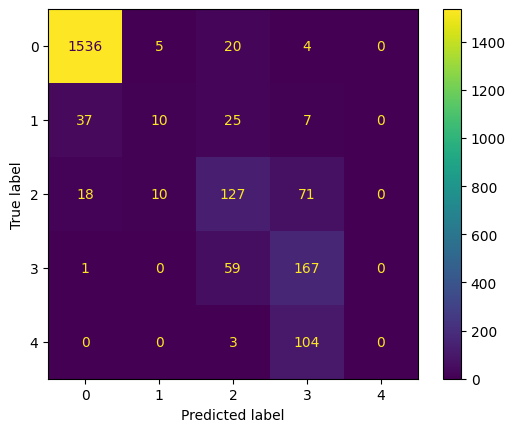

In [360]:
from sklearn.metrics import precision_score
precision = precision_score(y_test2, p, average='micro')

print(f'Precision: {precision}')

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4])
disp.plot()

In [361]:
from sklearn import metrics


print('MAE:', metrics.mean_absolute_error(y_test2, predictions))
print('MSE:', metrics.mean_squared_error(y_test2, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, predictions)))

MAE: 0.19147005444646098
MSE: 0.24863883847549909
RMSE: 0.4986369806537609
